![COUR_IPO.png](attachment:COUR_IPO.png)

# Welcome to the Data Science Coding Challange!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant machine learning problems with a unique dataset that will put your modeling skills to the test. Financial loan services are leveraged by companies across many industries, from big banks to financial institutions to government loans. One of the primary objectives of companies with financial loan services is to decrease payment defaults and ensure that individuals are paying back their loans as expected. In order to do this efficiently and systematically, many companies employ machine learning to predict which individuals are at the highest risk of defaulting on their loans, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the loan default prediction problem on a very unique and interesting group of individuals who have taken financial loans.

Imagine that you are a new data scientist at a major financial institution and you are tasked with building a model that can predict which individuals will default on their loan payments. We have provided a dataset that is a sample of individuals who received loans in 2021.

This financial institution has a vested interest in understanding the likelihood of each individual to default on their loan payments so that resources can be allocated appropriately to support these borrowers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past borrowers of a financial institution that contain information about the individual and the specific loan. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (255,347 borrowers to be exact) and importantly, will reveal whether or not the borrower has defaulted on their loan payments (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (109,435 borrowers to be exact), but does not disclose the “ground truth” for each borrower. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the borrowers in `test.csv` will default on their loan payments, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique Loan. For each Loan, a single observation (`LoanID`) is included during which the loan was active.

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Default` which indicates if a borrower has defaulted on payments.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [1]:
description_path ="https://raw.githubusercontent.com/Jasman123/Data_Science_Challange/main/data_descriptions.csv"

In [2]:
import pandas as pd
data_descriptions = pd.read_csv(description_path)
pd.set_option('display.max_colwidth', None)
data_descriptions

Column_name Column_type Data_type  \
0           LoanID  Identifier    string   
1              Age     Feature   integer   
2           Income     Feature   integer   
3       LoanAmount     Feature   integer   
4      CreditScore     Feature   integer   
5   MonthsEmployed     Feature   integer   
6   NumCreditLines     Feature   integer   
7     InterestRate     Feature     float   
8         LoanTerm     Feature   integer   
9         DTIRatio     Feature     float   
10       Education     Feature    string   
11  EmploymentType     Feature    string   
12   MaritalStatus     Feature    string   
13     HasMortgage     Feature    string   
14   HasDependents     Feature    string   
15     LoanPurpose     Feature    string   
16     HasCoSigner     Feature    string   
17         Default      Target   integer   

                                                                                          Description  
0                                                                  A unique identifier for each loan.  
1                                                                            The age of the borrower.  
2                                                                  The annual income of the borrower.  
3                                                                 The amount of money being borrowed.  
4                                The credit score of the borrower, indicating their creditworthiness.  
5                                                The number of months the borrower has been employed.  
6                                                   The number of credit lines the borrower has open.  
7                                                                     The interest rate for the loan.  
8                                                              The term length of the loan in months.  
9                  The Debt-to-Income ratio, indicating the borrower's debt compared to their income.  
10  The highest level of education attained by the borrower (PhD, Master's, Bachelor's, High School).  
11   The type of employment status of the borrower (Full-time, Part-time, Self-employed, Unemployed).  
12                                    The marital status of the borrower (Single, Married, Divorced).  
13                                                   Whether the borrower has a mortgage (Yes or No).  
14                                                   Whether the borrower has dependents (Yes or No).  
15                                  The purpose of the loan (Home, Auto, Education, Business, Other).  
16                                                      Whether the loan has a co-signer (Yes or No).  
17                   The binary target variable indicating whether the loan defaulted (1) or not (0).

## How to Submit your Predictions to Coursera
Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 109,435 rows (plus a header row). The first column should be `LoanID` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likelihood that the borrower will default__.

Your submission will show an error if you have extra columns (beyond `LoanID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `LoanID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which loans will default, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [3]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay,f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier



## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [5]:
test_path = "https://raw.githubusercontent.com/Jasman123/Data_Science_Challange/main/test.csv"
train_path = "https://raw.githubusercontent.com/Jasman123/Data_Science_Challange/main/train.csv"

In [6]:
train_df = pd.read_csv(train_path)
print('train_df Shape:', train_df.shape)
train_df= train_df.drop(['LoanID'], axis=1)
train_df.head()

train_df Shape: (255347, 18)


Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   56   85994       50587          520              80               4   
1   69   50432      124440          458              15               1   
2   46   84208      129188          451              26               3   
3   32   31713       44799          743               0               3   
4   60   20437        9139          633               8               4   

   InterestRate  LoanTerm  DTIRatio    Education EmploymentType MaritalStatus  \
0         15.23        36      0.44   Bachelor's      Full-time      Divorced   
1          4.81        60      0.68     Master's      Full-time       Married   
2         21.17        24      0.31     Master's     Unemployed      Divorced   
3          7.07        24      0.23  High School      Full-time       Married   
4          6.51        48      0.73   Bachelor's     Unemployed      Divorced   

  HasMortgage HasDependents LoanPurpose HasCoSigner  Default  
0         Yes           Yes       Other         Yes        0  
1          No            No       Other         Yes        0  
2         Yes           Yes        Auto          No        1  
3          No            No    Business          No        0  
4          No           Yes        Auto          No        0

In [7]:
test_df = pd.read_csv(test_path)
print('test_df Shape:', test_df.shape)
test_df = test_df.drop(['LoanID'], axis=1)
test_df.head()

test_df Shape: (109435, 17)


Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   32  131645       43797          802              23               2   
1   61  134312       18402          369              87               2   
2   55  115809      151774          563               3               3   
3   58   94970       55789          337              24               1   
4   63   71727      189798          451              52               3   

   InterestRate  LoanTerm  DTIRatio    Education EmploymentType MaritalStatus  \
0          6.10        24      0.13  High School      Full-time      Divorced   
1         12.99        60      0.59  High School  Self-employed        Single   
2          5.51        48      0.82   Bachelor's      Full-time        Single   
3         23.93        36      0.77   Bachelor's     Unemployed      Divorced   
4         22.05        48      0.44          PhD     Unemployed        Single   

  HasMortgage HasDependents LoanPurpose HasCoSigner  
0         Yes            No       Other          No  
1          No            No    Business         Yes  
2         Yes           Yes       Other         Yes  
3          No            No    Business          No  
4         Yes            No        Auto          No

## Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

In [8]:
# your code here (optional)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             255347 non-null  int64  
 1   Income          255347 non-null  int64  
 2   LoanAmount      255347 non-null  int64  
 3   CreditScore     255347 non-null  int64  
 4   MonthsEmployed  255347 non-null  int64  
 5   NumCreditLines  255347 non-null  int64  
 6   InterestRate    255347 non-null  float64
 7   LoanTerm        255347 non-null  int64  
 8   DTIRatio        255347 non-null  float64
 9   Education       255347 non-null  object 
 10  EmploymentType  255347 non-null  object 
 11  MaritalStatus   255347 non-null  object 
 12  HasMortgage     255347 non-null  object 
 13  HasDependents   255347 non-null  object 
 14  LoanPurpose     255347 non-null  object 
 15  HasCoSigner     255347 non-null  object 
 16  Default         255347 non-null  int64  
dtypes: float64

In [9]:
train_df.isnull().sum()

Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [10]:
train_df.describe()

Age         Income     LoanAmount    CreditScore  \
count  255347.000000  255347.000000  255347.000000  255347.000000   
mean       43.498306   82499.304597  127578.865512     574.264346   
std        14.990258   38963.013729   70840.706142     158.903867   
min        18.000000   15000.000000    5000.000000     300.000000   
25%        31.000000   48825.500000   66156.000000     437.000000   
50%        43.000000   82466.000000  127556.000000     574.000000   
75%        56.000000  116219.000000  188985.000000     712.000000   
max        69.000000  149999.000000  249999.000000     849.000000   

       MonthsEmployed  NumCreditLines   InterestRate       LoanTerm  \
count   255347.000000   255347.000000  255347.000000  255347.000000   
mean        59.541976        2.501036      13.492773      36.025894   
std         34.643376        1.117018       6.636443      16.969330   
min          0.000000        1.000000       2.000000      12.000000   
25%         30.000000        2.000000       7.770000      24.000000   
50%         60.000000        2.000000      13.460000      36.000000   
75%         90.000000        3.000000      19.250000      48.000000   
max        119.000000        4.000000      25.000000      60.000000   

            DTIRatio        Default  
count  255347.000000  255347.000000  
mean        0.500212       0.116128  
std         0.230917       0.320379  
min         0.100000       0.000000  
25%         0.300000       0.000000  
50%         0.500000       0.000000  
75%         0.700000       0.000000  
max         0.900000       1.000000

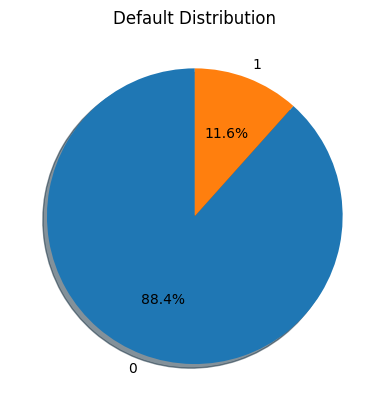

In [11]:
train_df['Default'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, shadow=True)
plt.ylabel("")
plt.title("Default Distribution")
plt.show()

In [12]:
numeric_columns = train_df.select_dtypes(include=[np.number]).columns
# sns.pairplot(train_df[numeric_columns])
# plt.show()

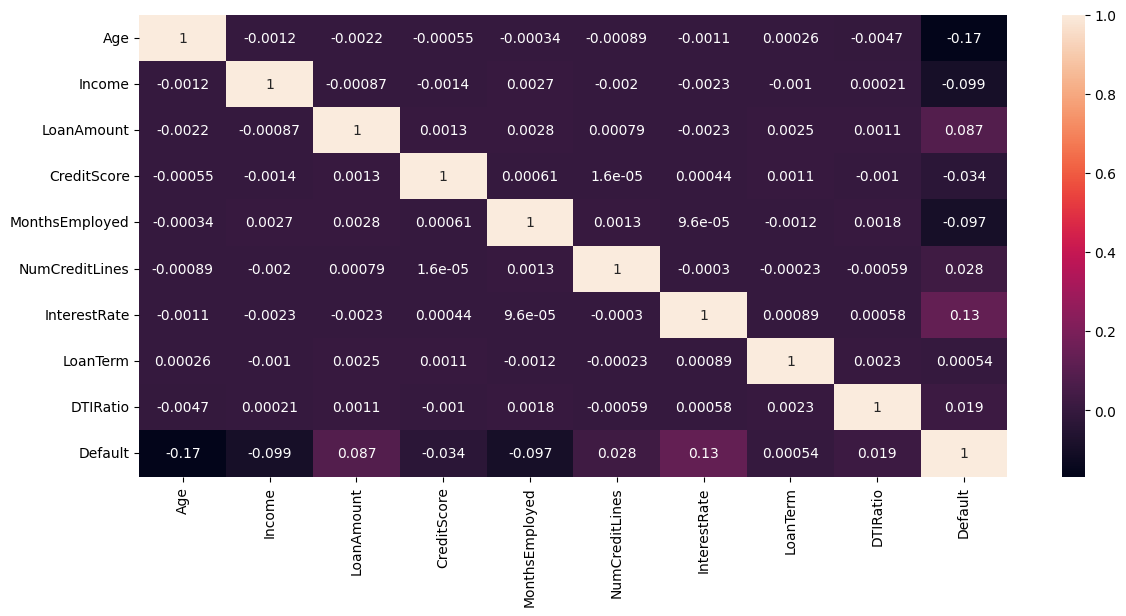

In [13]:
plt.figure(figsize=(14,6))
correlaction = train_df[numeric_columns].corr()
sns.heatmap(correlaction, annot=True)
plt.show()

In [14]:
correlaction['Default'].sort_values(ascending=False)

Default           1.000000
InterestRate      0.131273
LoanAmount        0.086659
NumCreditLines    0.028330
DTIRatio          0.019236
LoanTerm          0.000545
CreditScore      -0.034166
MonthsEmployed   -0.097374
Income           -0.099119
Age              -0.167783
Name: Default, dtype: float64

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


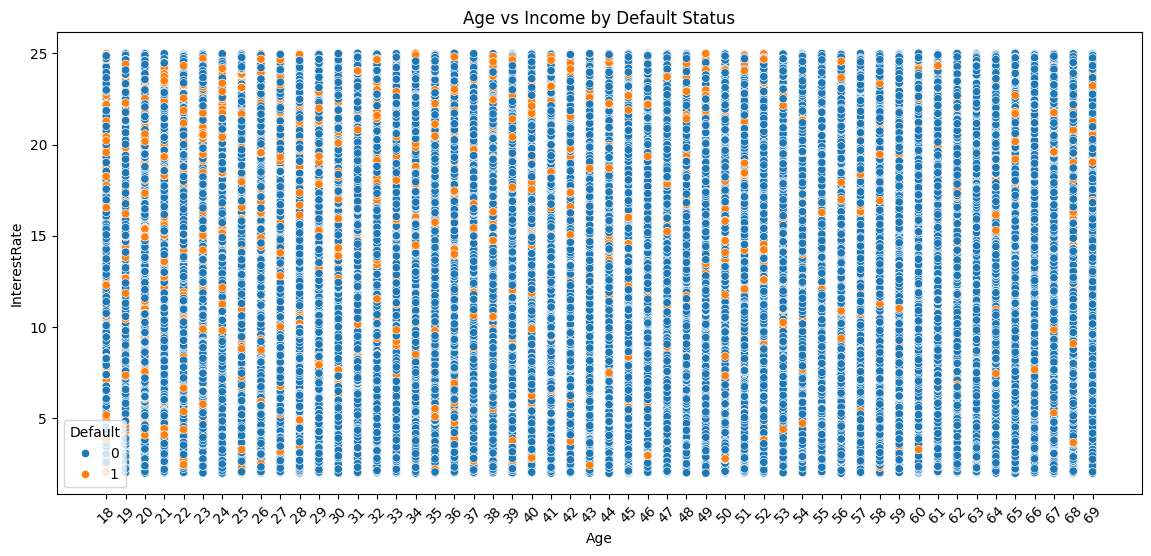

In [15]:
plt.figure(figsize=(14,6))
sns.scatterplot(
    data=train_df,
    x="Age",
    y="InterestRate",
    hue="Default"
)

# tick every 5 years for readability
plt.xticks(
    np.arange(train_df['Age'].min(), train_df['Age'].max() + 1),
    rotation=45
)

plt.title("Age vs Income by Default Status")
plt.show()

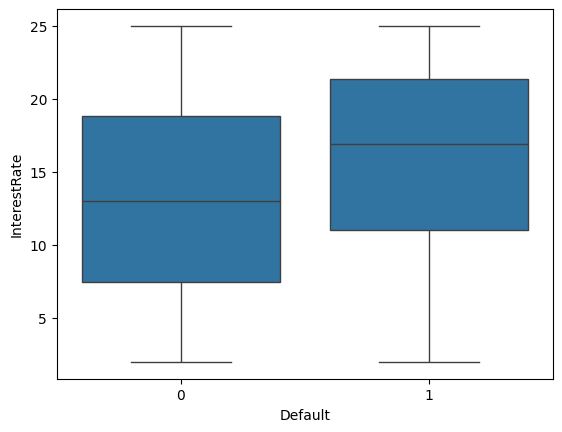

In [16]:
sns.boxplot(x='Default', y='InterestRate', data=train_df)
plt.show()

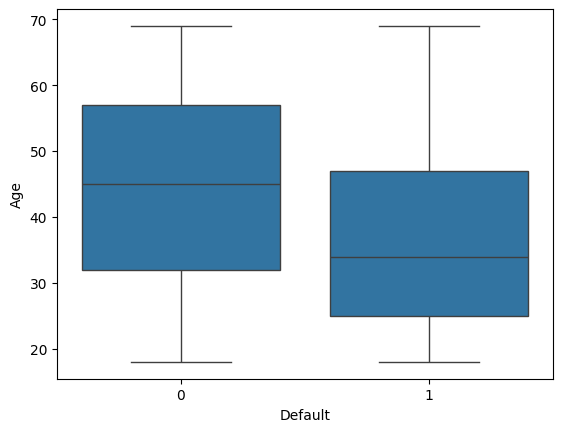

In [17]:
sns.boxplot(x='Default', y='Age', data=train_df)
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


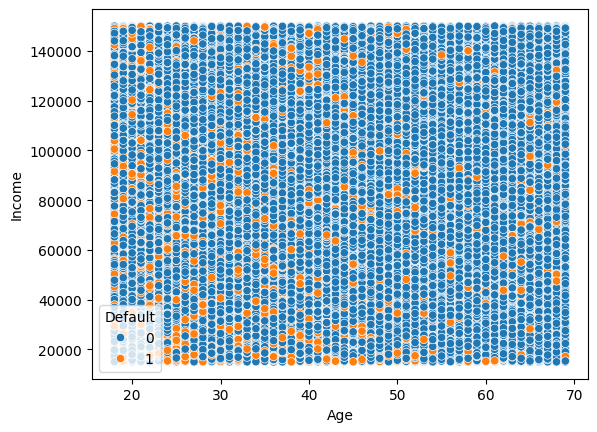

In [78]:
sns.scatterplot(x='Age', y='Income', data=train_df, hue='Default')
plt.show()

In [111]:
train_df['Income_Level'] = pd.cut(train_df['Income'],
                                  bins=[0, 25000, 75000, float('inf')],
                                  labels=['Low','Middle','High'])
train_df['Income_Level'] = train_df['Income_Level'].astype(str)
# df_grup = train_df.groupby('Income_Level')['Default'].mean()
# df_grup
train_df.head()

Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   56   85994       50587          520              80               4   
1   69   50432      124440          458              15               1   
2   46   84208      129188          451              26               3   
3   32   31713       44799          743               0               3   
4   60   20437        9139          633               8               4   

   InterestRate  LoanTerm  DTIRatio    Education EmploymentType MaritalStatus  \
0         15.23        36      0.44   Bachelor's      Full-time      Divorced   
1          4.81        60      0.68     Master's      Full-time       Married   
2         21.17        24      0.31     Master's     Unemployed      Divorced   
3          7.07        24      0.23  High School      Full-time       Married   
4          6.51        48      0.73   Bachelor's     Unemployed      Divorced   

  HasMortgage HasDependents LoanPurpose HasCoSigner  Default Income_Level  
0         Yes           Yes       Other         Yes        0         High  
1          No            No       Other         Yes        0       Middle  
2         Yes           Yes        Auto          No        1         High  
3          No            No    Business          No        0       Middle  
4          No           Yes        Auto          No        0          Low

In [112]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             255347 non-null  int64  
 1   Income          255347 non-null  int64  
 2   LoanAmount      255347 non-null  int64  
 3   CreditScore     255347 non-null  int64  
 4   MonthsEmployed  255347 non-null  int64  
 5   NumCreditLines  255347 non-null  int64  
 6   InterestRate    255347 non-null  float64
 7   LoanTerm        255347 non-null  int64  
 8   DTIRatio        255347 non-null  float64
 9   Education       255347 non-null  object 
 10  EmploymentType  255347 non-null  object 
 11  MaritalStatus   255347 non-null  object 
 12  HasMortgage     255347 non-null  object 
 13  HasDependents   255347 non-null  object 
 14  LoanPurpose     255347 non-null  object 
 15  HasCoSigner     255347 non-null  object 
 16  Default         255347 non-null  int64  
 17  Income_Lev

In [113]:
categorical_columns = train_df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
       'HasDependents', 'LoanPurpose', 'HasCoSigner', 'Income_Level'],
      dtype='object')

In [114]:
for col in categorical_columns:
  print(f"\n{col} value counts:")
  print(train_df[col].value_counts())


Education value counts:
Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64

EmploymentType value counts:
EmploymentType
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: count, dtype: int64

MaritalStatus value counts:
MaritalStatus
Married     85302
Divorced    85033
Single      85012
Name: count, dtype: int64

HasMortgage value counts:
HasMortgage
Yes    127677
No     127670
Name: count, dtype: int64

HasDependents value counts:
HasDependents
Yes    127742
No     127605
Name: count, dtype: int64

LoanPurpose value counts:
LoanPurpose
Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: count, dtype: int64

HasCoSigner value counts:
HasCoSigner
Yes    127701
No     127646
Name: count, dtype: int64

Income_Level value counts:
Income_Level
High      141882
Middle     94417
Low        19048
Name: count, dtype: int64



Education value counts:
Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64


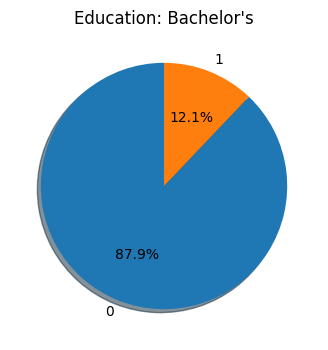

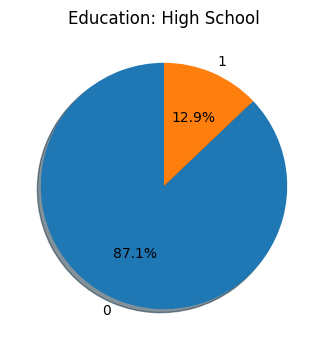

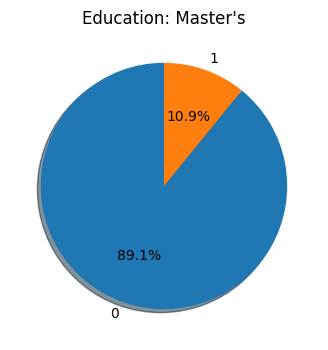

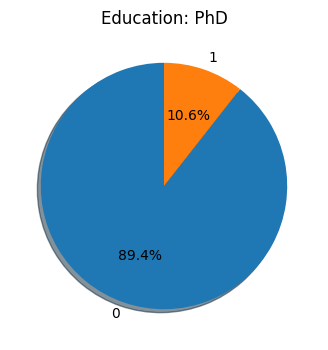






EmploymentType value counts:
EmploymentType
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: count, dtype: int64


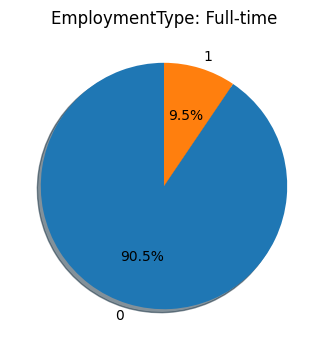

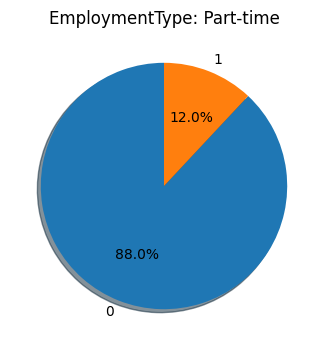

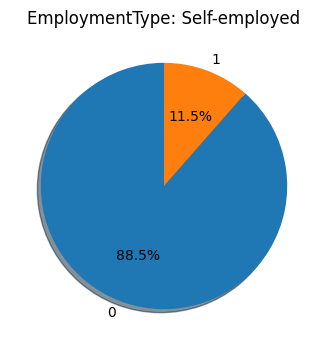

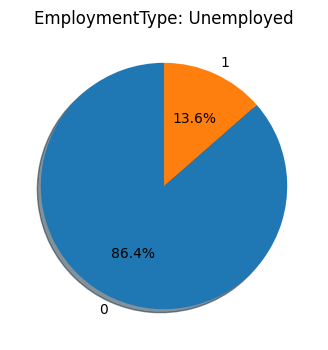






MaritalStatus value counts:
MaritalStatus
Married     85302
Divorced    85033
Single      85012
Name: count, dtype: int64


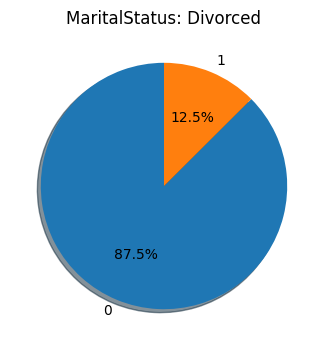

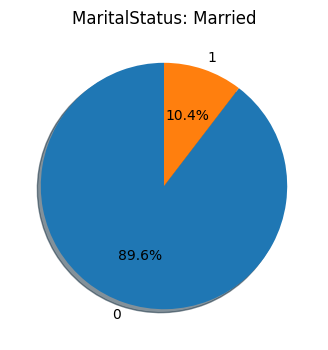

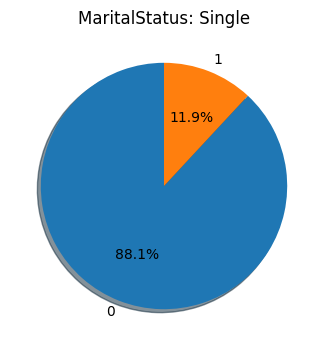






HasMortgage value counts:
HasMortgage
Yes    127677
No     127670
Name: count, dtype: int64


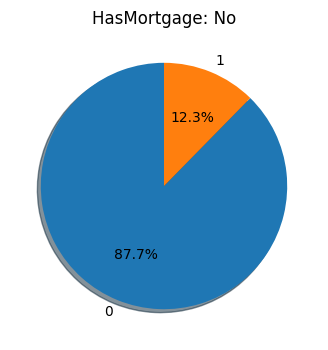

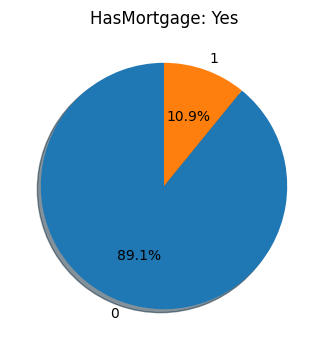






HasDependents value counts:
HasDependents
Yes    127742
No     127605
Name: count, dtype: int64


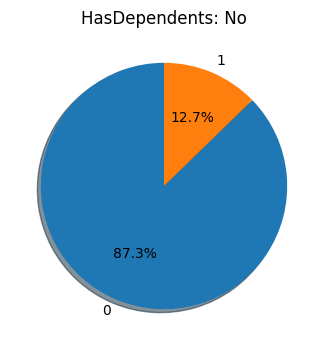

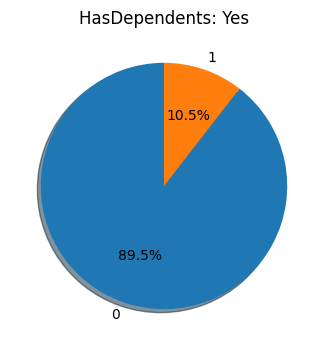






LoanPurpose value counts:
LoanPurpose
Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: count, dtype: int64


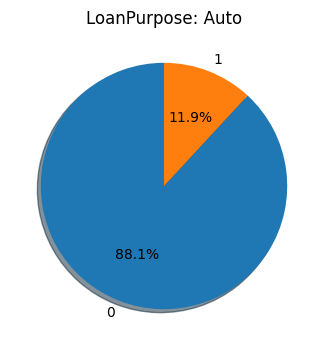

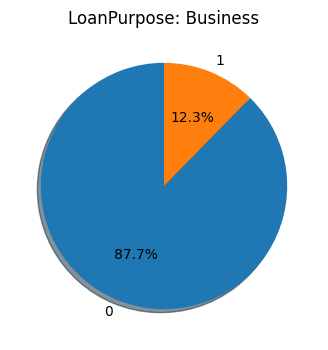

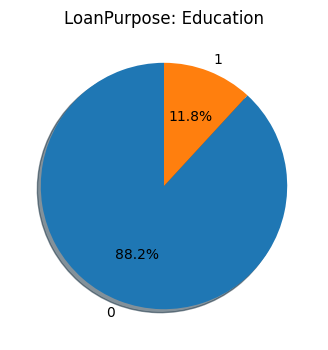

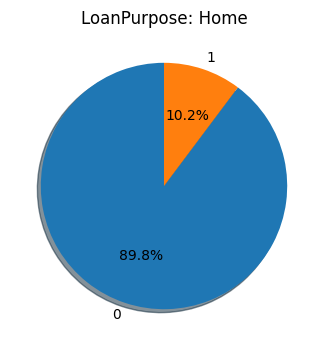

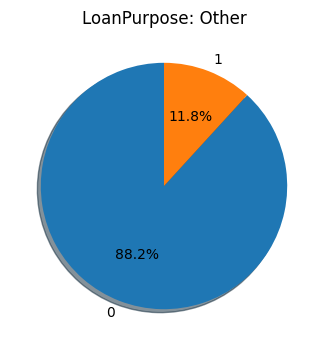






HasCoSigner value counts:
HasCoSigner
Yes    127701
No     127646
Name: count, dtype: int64


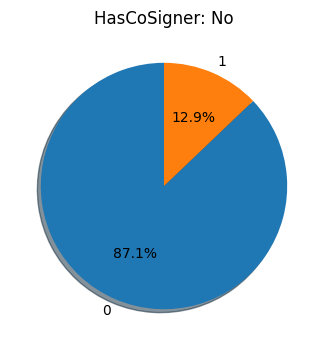

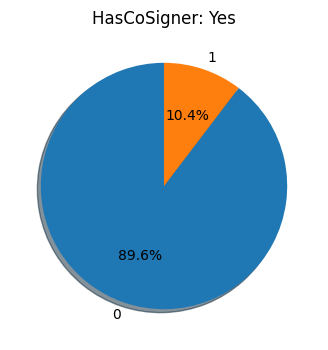






Income_Level value counts:
Income_Level
High      141882
Middle     94417
Low        19048
Name: count, dtype: int64


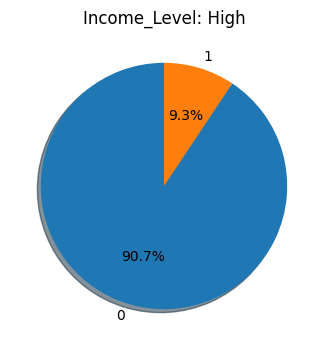

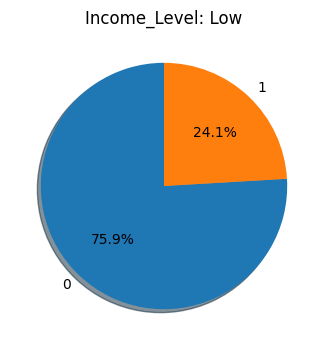

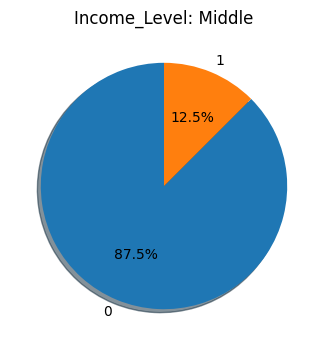

In [115]:
for col in categorical_columns:
  print(f"\n{col} value counts:")
  print(train_df[col].value_counts())

  # Cross-tab: category vs Default
  cross_tab = pd.crosstab(train_df[col], train_df["Default"], normalize='index')

  # Plot pie for each category
  for category in cross_tab.index:
      plt.figure(figsize=(4, 4))
      cross_tab.loc[category].plot.pie(
          autopct='%1.1f%%', startangle=90, shadow=True
      )
      plt.title(f"{col}: {category}")
      plt.ylabel("")  # remove y-label for cleaner look
      plt.show()

  print("\n\n\n")

In [116]:
train_dummies = pd.get_dummies(train_df, drop_first=True, columns = categorical_columns)
train_dummies.columns

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Default',
       'Education_High School', 'Education_Master's', 'Education_PhD',
       'EmploymentType_Part-time', 'EmploymentType_Self-employed',
       'EmploymentType_Unemployed', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'HasMortgage_Yes', 'HasDependents_Yes',
       'LoanPurpose_Business', 'LoanPurpose_Education', 'LoanPurpose_Home',
       'LoanPurpose_Other', 'HasCoSigner_Yes', 'Income_Level_Low',
       'Income_Level_Middle'],
      dtype='object')

In [117]:
X = train_dummies.drop(['Default'], axis=1)
Y = train_df['Default']

In [118]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [119]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    # ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

In [37]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

pipelines = {
    'Logistic Regression': Pipeline([
        ("scaler", StandardScaler()),
        ("logreg", LogisticRegression(max_iter=1000))
    ]),
    'SVM': Pipeline([
        ("scaler", StandardScaler()),
        ("svm", SVC())
    ]),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': Pipeline([
        ("scaler", StandardScaler()),
        ("knn", KNeighborsClassifier())
    ]),
    'Random Forest': Pipeline([
        ("scaler", StandardScaler()),
        ("rf", RandomForestClassifier())
    ]),
    'XGBoost': Pipeline([
        ("scaler", StandardScaler()),
        ("xgb", XGBClassifier())
    ]),
    'LightGBM': Pipeline([
        ("scaler", StandardScaler()),
        ("lgbm", LGBMClassifier())
    ]),
}

In [45]:
parameters_logreg = {
    'logreg__C': [0.01, 0.1, 1],
    'logreg__penalty': ['l2'],
    'logreg__solver': ['lbfgs','liblinear','sag','saga']
}

svm_parameters = {
    'svm__kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
    'svm__C': np.logspace(-3, 3, 5),
    'svm__gamma': np.logspace(-3, 3, 5)
}

tree_parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1,10)],
    'max_features': [None, 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}


knn_parameters = {
    'knn__n_neighbors': range(1, 11),
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'knn__p': [1, 2]
}

RandomForestClassifier_parameters = {
    "rf__n_estimators": [100, 200],   # small vs. bigger forest
    "rf__max_depth": [None, 10],      # unlimited vs. shallow trees
    "rf__min_samples_split": [2, 5]   # regularization
}


xgb_parameters = {
    "xgb__n_estimators": [100, 200],     # number of boosting rounds
    "xgb__max_depth": [3, 5],           # depth of trees
    "xgb__learning_rate": [0.05, 0.1],  # shrinkage
    "xgb__subsample": [0.8, 1.0],       # row sampling
}



In [40]:
# Dictionary of models and hyperparameters
model_dict = {
    'Logistic Regression': [pipelines['Logistic Regression'], parameters_logreg],
    'SVM': [pipelines['SVM'], svm_parameters],
    'Decision Tree': [pipelines['Decision Tree'], tree_parameters],
    'KNN': [pipelines['KNN'], knn_parameters],
    'Random Forest': [pipelines['Random Forest'], RandomForestClassifier_parameters],
    'XGBoost': [pipelines['XGBoost'], xgb_parameters]
}

In [41]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [42]:
# results = {}

# for name, (model, params) in model_dict.items():
#     print(f"\n🔍 Training {name} ...")

#     grid = GridSearchCV(
#         estimator=model,
#         param_grid=params,
#         cv=cv,
#         scoring="accuracy",
#         n_jobs=-1,
#         verbose=2
#     )

#     grid.fit(X_train, Y_train)

#     results[name] = {
#         "best_score": grid.best_score_,
#         "best_params": grid.best_params_
#     }
#     print(f"✅ {name} done!")

In [ ]:
# for name, (model, params) in model_dict.items():
#     print(f"\n🔍 Training {name} ...")
#     print(f"Best Model: {model}")
#     print(f"Best Params: {params}")

name = 'Logistic Regression'
model = model_dict[name][0]
params = model_dict[name][1]

In [ ]:
grid = GridSearchCV(
    estimator=model,
    param_grid=params,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1,
    verbose=2
)
grid.fit(X_train, Y_train)

print("Best Score:", grid.best_score_)
print("Best Params:", grid.best_params_)


Fitting 10 folds for each of 12 candidates, totalling 120 fits
Best Score: 0.8851657294460546
Best Params: {'logreg__C': 0.01, 'logreg__penalty': 'l2', 'logreg__solver': 'sag'}


In [ ]:
name = 'SVM'
model = model_dict[name][0]
params = model_dict[name][1]

grid = GridSearchCV(
    estimator=model,
    param_grid=params,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1,
    verbose=2
)
grid.fit(X_train, Y_train)

print("Best Score:", grid.best_score_)
print("Best Params:", grid.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [51]:
name = 'XGBoost'
model = model_dict[name][0]
params = model_dict[name][1]

grid = GridSearchCV(
    estimator=model,
    param_grid=params,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1,
    verbose=2
)
grid.fit(X_train, Y_train)

print("Best Score:", grid.best_score_)
print("Best Params:", grid.best_params_)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
Best Score: 0.8864678783898754
Best Params: {'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__n_estimators': 200, 'xgb__subsample': 0.8}


In [48]:
name = 'Random Forest'
model = model_dict[name][0]
params = model_dict[name][1]

grid = GridSearchCV(
    estimator=model,
    param_grid=params,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1,
    verbose=2
)
grid.fit(X_train, Y_train)

print("Best Score:", grid.best_score_)
print("Best Params:", grid.best_params_)

In [52]:
import joblib

# Save best model
joblib.dump(grid.best_estimator_, "best_xgb_model.pkl")
print("✅ Best model saved as best_xgb_model.pkl")

✅ Best model saved as best_xgb_model.pkl


In [53]:
best_xgb_loaded = joblib.load("best_xgb_model.pkl")
print("✅ Model loaded successfully!")

✅ Model loaded successfully!


In [120]:
best_xgb = best_xgb_loaded
best_xgb.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [121]:
y_pred = best_xgb.predict(X_test)
score = accuracy_score(Y_test, y_pred)
print("Accuracy Score:", score)

Accuracy Score: 0.886449970628549


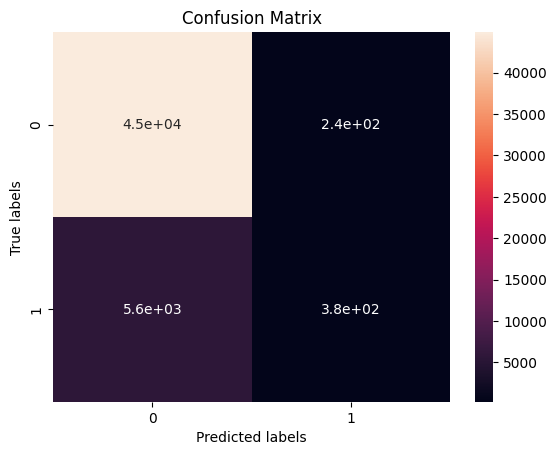

In [122]:
y_pred = best_xgb.predict(X_test)
plot_confusion_matrix(Y_test,y_pred)

In [123]:
print(classification_report(Y_test, y_pred))
print("ROC-AUC:", roc_auc_score(Y_test, best_xgb.predict_proba(X_test)[:,1]))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     45139
           1       0.61      0.06      0.12      5931

    accuracy                           0.89     51070
   macro avg       0.75      0.53      0.53     51070
weighted avg       0.86      0.89      0.84     51070

ROC-AUC: 0.758777989831884


In [124]:
from xgboost import XGBClassifier

# Best Score: 0.8864678783898754
# Best Params: {'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__n_estimators': 200, 'xgb__subsample': 0.8}

# class imbalance ratio
scale = len(Y_train[Y_train==0]) / len(Y_train[Y_train==1])

# include both tuned params + scale_pos_weight
xgb = XGBClassifier(
    learning_rate=0.1,
    max_depth=3,
    n_estimators=200,
    subsample=0.8,
    scale_pos_weight=scale,
    eval_metric="logloss",
    use_label_encoder=False
)

xgb.fit(X_train, Y_train)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:35:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [125]:
y_pred = xgb.predict(X_test)
score = accuracy_score(Y_test, y_pred)
print("Accuracy Score:", score)
print(classification_report(Y_test, y_pred))
print("ROC-AUC:", roc_auc_score(Y_test, best_xgb.predict_proba(X_test)[:,1]))

Accuracy Score: 0.6914039553553946
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     45139
           1       0.23      0.69      0.34      5931

    accuracy                           0.69     51070
   macro avg       0.59      0.69      0.57     51070
weighted avg       0.86      0.69      0.75     51070

ROC-AUC: 0.758777989831884


In [63]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.4/247.4 kB 14.1 MB/s eta 0:00:00


In [67]:
import lightgbm as lgb
import optuna
from sklearn.model_selection import cross_val_score, StratifiedKFold

def objective_lgb(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "max_depth": trial.suggest_int("max_depth", -1, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 20, 200),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "random_state": 42,
        "n_jobs": -1
    }

    model = lgb.LGBMClassifier(**params)

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train, Y_train, cv=cv, scoring="accuracy")

    return scores.mean()

study_lgb = optuna.create_study(direction="maximize")
study_lgb.optimize(objective_lgb, n_trials=50)

print("Best Score (LGBM):", study_lgb.best_value)
print("Best Params (LGBM):", study_lgb.best_params)


[I 2025-08-30 06:22:09,387] A new study created in memory with name: no-name-92171924-f197-4ab7-8323-82e8a6c69850


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008828 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 163421, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116123 -> initscore=-2.029664
[LightGBM] [Info] Start training from score -2.029664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-08-30 06:22:52,563] Trial 0 finished with value: 0.8861105263767085 and parameters: {'n_estimators': 345, 'max_depth': 5, 'learning_rate': 0.017979431933879766, 'num_leaves': 125, 'subsample': 0.6031682465388587, 'colsample_bytree': 0.685156367339421}. Best is trial 0 with value: 0.8861105263767085.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.094510 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 163421, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116123 -> initscore=-2.029664
[LightGBM] [Info] Start training from score -2.029664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[I 2025-08-30 06:23:09,636] Trial 1 finished with value: 0.8838733681518767 and parameters: {'n_estimators': 125, 'max_depth': 4, 'learning_rate': 0.011645716931223696, 'num_leaves': 108, 'subsample': 0.7002331887559673, 'colsample_bytree': 0.6290513983038083}. Best is trial 0 with value: 0.8861105263767085.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.037564 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 163421, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116123 -> initscore=-2.029664
[LightGBM] [Info] Start training from score -2.029664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[I 2025-08-30 06:23:26,166] Trial 2 finished with value: 0.8857678548958061 and parameters: {'n_estimators': 108, 'max_depth': 5, 'learning_rate': 0.03712750647157751, 'num_leaves': 48, 'subsample': 0.6340529252868269, 'colsample_bytree': 0.6848870589584244}. Best is trial 0 with value: 0.8861105263767085.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008012 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 163421, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116123 -> initscore=-2.029664
[LightGBM] [Info] Start training from score -2.029664
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007707 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `forc

[I 2025-08-30 06:24:19,726] Trial 3 finished with value: 0.8850188758272155 and parameters: {'n_estimators': 373, 'max_depth': 0, 'learning_rate': 0.07679337700715115, 'num_leaves': 199, 'subsample': 0.8958604297329462, 'colsample_bytree': 0.7274086493014152}. Best is trial 0 with value: 0.8861105263767085.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 163421, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116123 -> initscore=-2.029664
[LightGBM] [Info] Start training from score -2.029664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-08-30 06:24:35,425] Trial 4 finished with value: 0.8864091419992051 and parameters: {'n_estimators': 138, 'max_depth': 4, 'learning_rate': 0.09263131156910669, 'num_leaves': 121, 'subsample': 0.7961950979802784, 'colsample_bytree': 0.9811515935090718}. Best is trial 4 with value: 0.8864091419992051.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016681 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 163421, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116123 -> initscore=-2.029664
[LightGBM] [Info] Start training from score -2.029664
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `forc

[I 2025-08-30 06:25:33,021] Trial 5 finished with value: 0.8781556466192086 and parameters: {'n_estimators': 421, 'max_depth': 10, 'learning_rate': 0.29695760972625307, 'num_leaves': 166, 'subsample': 0.7800371198008501, 'colsample_bytree': 0.997674889257765}. Best is trial 4 with value: 0.8864091419992051.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007758 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 163421, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116123 -> initscore=-2.029664
[LightGBM] [Info] Start training from score -2.029664
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007891 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `forc

[I 2025-08-30 06:26:31,820] Trial 6 finished with value: 0.8859538785184903 and parameters: {'n_estimators': 442, 'max_depth': -1, 'learning_rate': 0.03505994901339017, 'num_leaves': 113, 'subsample': 0.9509252220663388, 'colsample_bytree': 0.8487222948728933}. Best is trial 4 with value: 0.8864091419992051.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.061213 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 163421, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116123 -> initscore=-2.029664
[LightGBM] [Info] Start training from score -2.029664
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008577 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [

[I 2025-08-30 06:27:00,260] Trial 7 finished with value: 0.8851999970188811 and parameters: {'n_estimators': 187, 'max_depth': 9, 'learning_rate': 0.01388339870881702, 'num_leaves': 35, 'subsample': 0.954725686741539, 'colsample_bytree': 0.6199028470602084}. Best is trial 4 with value: 0.8864091419992051.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008098 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 163421, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116123 -> initscore=-2.029664
[LightGBM] [Info] Start training from score -2.029664
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008251 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `forc

[I 2025-08-30 06:27:41,754] Trial 8 finished with value: 0.8860419956271969 and parameters: {'n_estimators': 499, 'max_depth': -1, 'learning_rate': 0.07677728025694941, 'num_leaves': 25, 'subsample': 0.778564269436631, 'colsample_bytree': 0.9741065931711037}. Best is trial 4 with value: 0.8864091419992051.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007637 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 163421, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116123 -> initscore=-2.029664
[LightGBM] [Info] Start training from score -2.029664
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007624 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `forc

[I 2025-08-30 06:28:43,200] Trial 9 finished with value: 0.8863455031365612 and parameters: {'n_estimators': 407, 'max_depth': 0, 'learning_rate': 0.02606919800206022, 'num_leaves': 132, 'subsample': 0.9047715577111749, 'colsample_bytree': 0.6773972633675472}. Best is trial 4 with value: 0.8864091419992051.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007714 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 163421, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116123 -> initscore=-2.029664
[LightGBM] [Info] Start training from score -2.029664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-08-30 06:29:03,628] Trial 10 finished with value: 0.8861496909473457 and parameters: {'n_estimators': 255, 'max_depth': 3, 'learning_rate': 0.1873803357276754, 'num_leaves': 76, 'subsample': 0.8451765176953752, 'colsample_bytree': 0.8967302851386298}. Best is trial 4 with value: 0.8864091419992051.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007732 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 163421, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116123 -> initscore=-2.029664
[LightGBM] [Info] Start training from score -2.029664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-08-30 06:29:20,921] Trial 11 finished with value: 0.885434972460715 and parameters: {'n_estimators': 266, 'max_depth': 1, 'learning_rate': 0.12130917043719622, 'num_leaves': 147, 'subsample': 0.845927788655327, 'colsample_bytree': 0.7757686857922397}. Best is trial 4 with value: 0.8864091419992051.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007906 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 163421, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116123 -> initscore=-2.029664
[LightGBM] [Info] Start training from score -2.029664
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007827 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `forc

[I 2025-08-30 06:29:52,472] Trial 12 finished with value: 0.886458093818355 and parameters: {'n_estimators': 204, 'max_depth': 7, 'learning_rate': 0.0258578413740701, 'num_leaves': 86, 'subsample': 0.7296690748149357, 'colsample_bytree': 0.9027977350524659}. Best is trial 12 with value: 0.886458093818355.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007702 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 163421, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116123 -> initscore=-2.029664
[LightGBM] [Info] Start training from score -2.029664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-08-30 06:30:19,721] Trial 13 finished with value: 0.8859391944704939 and parameters: {'n_estimators': 187, 'max_depth': 7, 'learning_rate': 0.05784714744073363, 'num_leaves': 81, 'subsample': 0.7132223773374582, 'colsample_bytree': 0.9184580007665304}. Best is trial 12 with value: 0.886458093818355.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 163421, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116123 -> initscore=-2.029664
[LightGBM] [Info] Start training from score -2.029664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-08-30 06:30:45,357] Trial 14 finished with value: 0.8850286660712257 and parameters: {'n_estimators': 191, 'max_depth': 7, 'learning_rate': 0.1295811556828523, 'num_leaves': 81, 'subsample': 0.7204297734972618, 'colsample_bytree': 0.93906832524455}. Best is trial 12 with value: 0.886458093818355.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007762 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 163421, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116123 -> initscore=-2.029664
[LightGBM] [Info] Start training from score -2.029664
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007722 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `forc

[I 2025-08-30 06:31:12,078] Trial 15 finished with value: 0.8860860506468633 and parameters: {'n_estimators': 153, 'max_depth': 7, 'learning_rate': 0.023567601550604476, 'num_leaves': 94, 'subsample': 0.6681438723801278, 'colsample_bytree': 0.859224183294828}. Best is trial 12 with value: 0.886458093818355.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007843 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 163421, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116123 -> initscore=-2.029664
[LightGBM] [Info] Start training from score -2.029664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-08-30 06:31:36,049] Trial 16 finished with value: 0.8862378041019957 and parameters: {'n_estimators': 258, 'max_depth': 3, 'learning_rate': 0.046154060196317334, 'num_leaves': 54, 'subsample': 0.7463314083639726, 'colsample_bytree': 0.8067598994301693}. Best is trial 12 with value: 0.886458093818355.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010918 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 163421, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116123 -> initscore=-2.029664
[LightGBM] [Info] Start training from score -2.029664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-08-30 06:32:14,052] Trial 17 finished with value: 0.8848915927100329 and parameters: {'n_estimators': 228, 'max_depth': 8, 'learning_rate': 0.09102447823710975, 'num_leaves': 179, 'subsample': 0.8289322446432272, 'colsample_bytree': 0.9513220259747731}. Best is trial 12 with value: 0.886458093818355.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007796 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 163421, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116123 -> initscore=-2.029664
[LightGBM] [Info] Start training from score -2.029664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-08-30 06:32:55,759] Trial 18 finished with value: 0.8861594829886542 and parameters: {'n_estimators': 316, 'max_depth': 6, 'learning_rate': 0.05573947108160351, 'num_leaves': 151, 'subsample': 0.8101565471601834, 'colsample_bytree': 0.8788828839160292}. Best is trial 12 with value: 0.886458093818355.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007856 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 163421, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116123 -> initscore=-2.029664
[LightGBM] [Info] Start training from score -2.029664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-08-30 06:33:08,806] Trial 19 finished with value: 0.883981065029684 and parameters: {'n_estimators': 151, 'max_depth': 2, 'learning_rate': 0.025784998452458668, 'num_leaves': 100, 'subsample': 0.7603801430425885, 'colsample_bytree': 0.8138676919554406}. Best is trial 12 with value: 0.886458093818355.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007738 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 163421, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116123 -> initscore=-2.029664
[LightGBM] [Info] Start training from score -2.029664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-08-30 06:33:31,825] Trial 20 finished with value: 0.8860958416097928 and parameters: {'n_estimators': 219, 'max_depth': 4, 'learning_rate': 0.1690835165484733, 'num_leaves': 62, 'subsample': 0.8877049347283583, 'colsample_bytree': 0.9180847716935785}. Best is trial 12 with value: 0.886458093818355.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007673 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 163421, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116123 -> initscore=-2.029664
[LightGBM] [Info] Start training from score -2.029664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-08-30 06:33:51,988] Trial 21 finished with value: 0.8838733681518767 and parameters: {'n_estimators': 307, 'max_depth': 1, 'learning_rate': 0.023343984167979975, 'num_leaves': 134, 'subsample': 0.9053996007004923, 'colsample_bytree': 0.7535968249880758}. Best is trial 12 with value: 0.886458093818355.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008221 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 163421, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116123 -> initscore=-2.029664
[LightGBM] [Info] Start training from score -2.029664
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.083940 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [

[I 2025-08-30 06:34:54,425] Trial 22 finished with value: 0.8859196112266161 and parameters: {'n_estimators': 417, 'max_depth': 9, 'learning_rate': 0.03454721573861973, 'num_leaves': 125, 'subsample': 0.9816216688278363, 'colsample_bytree': 0.9965842877411422}. Best is trial 12 with value: 0.886458093818355.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015533 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 163421, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116123 -> initscore=-2.029664
[LightGBM] [Info] Start training from score -2.029664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-08-30 06:35:07,488] Trial 23 finished with value: 0.8838733681518767 and parameters: {'n_estimators': 138, 'max_depth': 2, 'learning_rate': 0.014234342796269488, 'num_leaves': 142, 'subsample': 0.8671306939536061, 'colsample_bytree': 0.665124719186316}. Best is trial 12 with value: 0.886458093818355.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007702 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 163421, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116123 -> initscore=-2.029664
[LightGBM] [Info] Start training from score -2.029664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-08-30 06:36:22,050] Trial 24 finished with value: 0.8863210270472566 and parameters: {'n_estimators': 486, 'max_depth': 6, 'learning_rate': 0.018566044888122, 'num_leaves': 114, 'subsample': 0.6725692309051411, 'colsample_bytree': 0.8367803467713278}. Best is trial 12 with value: 0.886458093818355.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009018 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 163421, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116123 -> initscore=-2.029664
[LightGBM] [Info] Start training from score -2.029664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-08-30 06:36:39,630] Trial 25 finished with value: 0.8859147146667723 and parameters: {'n_estimators': 104, 'max_depth': 6, 'learning_rate': 0.03008424276066276, 'num_leaves': 161, 'subsample': 0.7999469088233431, 'colsample_bytree': 0.9610429171154157}. Best is trial 12 with value: 0.886458093818355.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007795 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 163421, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116123 -> initscore=-2.029664
[LightGBM] [Info] Start training from score -2.029664
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007743 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `forc

[I 2025-08-30 06:37:27,204] Trial 26 finished with value: 0.8862035383677803 and parameters: {'n_estimators': 370, 'max_depth': 0, 'learning_rate': 0.04401166642059728, 'num_leaves': 93, 'subsample': 0.7396987801343207, 'colsample_bytree': 0.7268143236300039}. Best is trial 12 with value: 0.886458093818355.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007772 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 163421, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116123 -> initscore=-2.029664
[LightGBM] [Info] Start training from score -2.029664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-08-30 06:37:43,972] Trial 27 finished with value: 0.8863014430844594 and parameters: {'n_estimators': 167, 'max_depth': 3, 'learning_rate': 0.07147476968216006, 'num_leaves': 123, 'subsample': 0.9298455536960815, 'colsample_bytree': 0.8922037575966375}. Best is trial 12 with value: 0.886458093818355.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019022 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 163421, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116123 -> initscore=-2.029664
[LightGBM] [Info] Start training from score -2.029664
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007930 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `forc

[I 2025-08-30 06:38:20,369] Trial 28 finished with value: 0.8862427009014795 and parameters: {'n_estimators': 218, 'max_depth': 8, 'learning_rate': 0.018443791062579224, 'num_leaves': 69, 'subsample': 0.8067927599776765, 'colsample_bytree': 0.9218503712894079}. Best is trial 12 with value: 0.886458093818355.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007651 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 163421, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116123 -> initscore=-2.029664
[LightGBM] [Info] Start training from score -2.029664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-08-30 06:39:09,546] Trial 29 finished with value: 0.8855916234342505 and parameters: {'n_estimators': 339, 'max_depth': 5, 'learning_rate': 0.010489121773942024, 'num_leaves': 130, 'subsample': 0.6199027551980648, 'colsample_bytree': 0.6565958955752808}. Best is trial 12 with value: 0.886458093818355.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007670 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 163421, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116123 -> initscore=-2.029664
[LightGBM] [Info] Start training from score -2.029664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-08-30 06:39:32,963] Trial 30 finished with value: 0.8864189317639356 and parameters: {'n_estimators': 282, 'max_depth': 2, 'learning_rate': 0.11012358489636961, 'num_leaves': 101, 'subsample': 0.6848617679206792, 'colsample_bytree': 0.7175225731943737}. Best is trial 12 with value: 0.886458093818355.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007760 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 163421, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116123 -> initscore=-2.029664
[LightGBM] [Info] Start training from score -2.029664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-08-30 06:39:54,910] Trial 31 finished with value: 0.8864287224872254 and parameters: {'n_estimators': 287, 'max_depth': 2, 'learning_rate': 0.11108447850836743, 'num_leaves': 103, 'subsample': 0.6849025968714169, 'colsample_bytree': 0.7029166463334452}. Best is trial 12 with value: 0.886458093818355.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.090894 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 163421, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116123 -> initscore=-2.029664
[LightGBM] [Info] Start training from score -2.029664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[I 2025-08-30 06:40:26,443] Trial 32 finished with value: 0.8863161309666923 and parameters: {'n_estimators': 278, 'max_depth': 4, 'learning_rate': 0.10661222979574149, 'num_leaves': 104, 'subsample': 0.6729597879918265, 'colsample_bytree': 0.7204606608408344}. Best is trial 12 with value: 0.886458093818355.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007701 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 163421, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116123 -> initscore=-2.029664
[LightGBM] [Info] Start training from score -2.029664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-08-30 06:40:45,578] Trial 33 finished with value: 0.8864189335612339 and parameters: {'n_estimators': 236, 'max_depth': 2, 'learning_rate': 0.15110721859235857, 'num_leaves': 87, 'subsample': 0.6476225246407927, 'colsample_bytree': 0.705363617669392}. Best is trial 12 with value: 0.886458093818355.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007665 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 163421, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116123 -> initscore=-2.029664
[LightGBM] [Info] Start training from score -2.029664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-08-30 06:41:10,240] Trial 34 finished with value: 0.8865070471951636 and parameters: {'n_estimators': 294, 'max_depth': 2, 'learning_rate': 0.17754305639188347, 'num_leaves': 90, 'subsample': 0.6499610383022861, 'colsample_bytree': 0.7118865213715273}. Best is trial 34 with value: 0.8865070471951636.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 163421, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116123 -> initscore=-2.029664
[LightGBM] [Info] Start training from score -2.029664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-08-30 06:41:30,992] Trial 35 finished with value: 0.8864042457988208 and parameters: {'n_estimators': 239, 'max_depth': 2, 'learning_rate': 0.26690357005707094, 'num_leaves': 88, 'subsample': 0.6038160087588408, 'colsample_bytree': 0.6026909278495748}. Best is trial 34 with value: 0.8865070471951636.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007625 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 163421, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116123 -> initscore=-2.029664
[LightGBM] [Info] Start training from score -2.029664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-08-30 06:41:50,380] Trial 36 finished with value: 0.8857629597738012 and parameters: {'n_estimators': 294, 'max_depth': 1, 'learning_rate': 0.16548171267251385, 'num_leaves': 48, 'subsample': 0.6467828028985092, 'colsample_bytree': 0.7636737520389634}. Best is trial 34 with value: 0.8865070471951636.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007614 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 163421, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116123 -> initscore=-2.029664
[LightGBM] [Info] Start training from score -2.029664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-08-30 06:42:20,178] Trial 37 finished with value: 0.8862182227752363 and parameters: {'n_estimators': 324, 'max_depth': 3, 'learning_rate': 0.23309012580753005, 'num_leaves': 65, 'subsample': 0.6475855329044026, 'colsample_bytree': 0.7061282921622772}. Best is trial 34 with value: 0.8865070471951636.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007626 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 163421, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116123 -> initscore=-2.029664
[LightGBM] [Info] Start training from score -2.029664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-08-30 06:43:02,810] Trial 38 finished with value: 0.8856797391051184 and parameters: {'n_estimators': 362, 'max_depth': 5, 'learning_rate': 0.14403975393582977, 'num_leaves': 110, 'subsample': 0.7032398457761079, 'colsample_bytree': 0.6925625619757061}. Best is trial 34 with value: 0.8865070471951636.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.087981 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 163421, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116123 -> initscore=-2.029664
[LightGBM] [Info] Start training from score -2.029664
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007750 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [

[I 2025-08-30 06:43:24,225] Trial 39 finished with value: 0.8838733698293553 and parameters: {'n_estimators': 203, 'max_depth': 0, 'learning_rate': 0.20340413406428362, 'num_leaves': 88, 'subsample': 0.6299161236360526, 'colsample_bytree': 0.6429494240721415}. Best is trial 34 with value: 0.8865070471951636.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007761 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 163421, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116123 -> initscore=-2.029664
[LightGBM] [Info] Start training from score -2.029664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-08-30 06:43:41,057] Trial 40 finished with value: 0.8856650529003639 and parameters: {'n_estimators': 243, 'max_depth': 1, 'learning_rate': 0.1506910341756797, 'num_leaves': 74, 'subsample': 0.6945864938082982, 'colsample_bytree': 0.7449901400832095}. Best is trial 34 with value: 0.8865070471951636.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.055399 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 163421, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116123 -> initscore=-2.029664
[LightGBM] [Info] Start training from score -2.029664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[I 2025-08-30 06:44:06,512] Trial 41 finished with value: 0.8864434082127002 and parameters: {'n_estimators': 286, 'max_depth': 2, 'learning_rate': 0.11029683353736641, 'num_leaves': 99, 'subsample': 0.6862767102832199, 'colsample_bytree': 0.7038469100665472}. Best is trial 34 with value: 0.8865070471951636.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007818 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 163421, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116123 -> initscore=-2.029664
[LightGBM] [Info] Start training from score -2.029664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-08-30 06:44:32,696] Trial 42 finished with value: 0.8863748732694923 and parameters: {'n_estimators': 297, 'max_depth': 2, 'learning_rate': 0.09684044108150199, 'num_leaves': 113, 'subsample': 0.6463019174372483, 'colsample_bytree': 0.6969032186394094}. Best is trial 34 with value: 0.8865070471951636.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007630 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 163421, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116123 -> initscore=-2.029664
[LightGBM] [Info] Start training from score -2.029664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-08-30 06:45:08,675] Trial 43 finished with value: 0.8864531994152692 and parameters: {'n_estimators': 338, 'max_depth': 3, 'learning_rate': 0.06960862003392236, 'num_leaves': 86, 'subsample': 0.725168721622047, 'colsample_bytree': 0.7813131495320805}. Best is trial 34 with value: 0.8865070471951636.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007712 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 163421, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116123 -> initscore=-2.029664
[LightGBM] [Info] Start training from score -2.029664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-08-30 06:45:48,950] Trial 44 finished with value: 0.8863210270472566 and parameters: {'n_estimators': 341, 'max_depth': 4, 'learning_rate': 0.08352332504340348, 'num_leaves': 98, 'subsample': 0.7243352596140001, 'colsample_bytree': 0.778153918357619}. Best is trial 34 with value: 0.8865070471951636.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007729 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 163421, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116123 -> initscore=-2.029664
[LightGBM] [Info] Start training from score -2.029664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-08-30 06:46:22,643] Trial 45 finished with value: 0.8863503981387464 and parameters: {'n_estimators': 328, 'max_depth': 3, 'learning_rate': 0.06598437595140261, 'num_leaves': 58, 'subsample': 0.7595064666299615, 'colsample_bytree': 0.7428768904632396}. Best is trial 34 with value: 0.8865070471951636.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007731 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 163421, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116123 -> initscore=-2.029664
[LightGBM] [Info] Start training from score -2.029664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-08-30 06:46:48,453] Trial 46 finished with value: 0.8850874064569073 and parameters: {'n_estimators': 358, 'max_depth': 1, 'learning_rate': 0.06389380294381572, 'num_leaves': 79, 'subsample': 0.7278373732672834, 'colsample_bytree': 0.7789400925551148}. Best is trial 34 with value: 0.8865070471951636.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007650 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 163421, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116123 -> initscore=-2.029664
[LightGBM] [Info] Start training from score -2.029664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-08-30 06:47:28,624] Trial 47 finished with value: 0.8863895591147868 and parameters: {'n_estimators': 393, 'max_depth': 3, 'learning_rate': 0.11500717817030341, 'num_leaves': 118, 'subsample': 0.6879708995285733, 'colsample_bytree': 0.66957431776755}. Best is trial 34 with value: 0.8865070471951636.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007754 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 163421, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116123 -> initscore=-2.029664
[LightGBM] [Info] Start training from score -2.029664
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007821 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `forc

[I 2025-08-30 06:48:09,385] Trial 48 finished with value: 0.88633571421057 and parameters: {'n_estimators': 392, 'max_depth': 10, 'learning_rate': 0.04818667464088506, 'num_leaves': 38, 'subsample': 0.7753831744817578, 'colsample_bytree': 0.7929375965998491}. Best is trial 34 with value: 0.8865070471951636.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18977, number of negative: 144444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007642 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 163421, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116123 -> initscore=-2.029664
[LightGBM] [Info] Start training from score -2.029664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-08-30 06:48:43,662] Trial 49 finished with value: 0.8864336182083298 and parameters: {'n_estimators': 274, 'max_depth': 4, 'learning_rate': 0.13477707928959137, 'num_leaves': 70, 'subsample': 0.6656351225999113, 'colsample_bytree': 0.6414909626522355}. Best is trial 34 with value: 0.8865070471951636.


Best Score (LGBM): 0.8865070471951636
Best Params (LGBM): {'n_estimators': 294, 'max_depth': 2, 'learning_rate': 0.17754305639188347, 'num_leaves': 90, 'subsample': 0.6499610383022861, 'colsample_bytree': 0.7118865213715273}


In [69]:
best_lgb = LGBMClassifier(**study_lgb.best_params)
joblib.dump(best_lgb, "best_lgb_model.pkl")
print("✅ Best model saved as best_xgb_model.pkl")

✅ Best model saved as best_xgb_model.pkl


## Make predictions (required)

Remember you should create a dataframe named `prediction_df` with exactly 109,435 entries plus a header row attempting to predict the likelihood of borrowers to default on their loans in `test_df`. Your submission will throw an error if you have extra columns (beyond `LoanID` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`LoanID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `LoanID` and `predicted_probability`!

### Example prediction submission:

The code below is a very naive prediction method that simply predicts loan defaults using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

**PLEASE CHANGE CODE BELOW TO IMPLEMENT YOUR OWN PREDICTIONS**

In [ ]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Fit a dummy classifier on the feature columns in train_df:
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(train_df.drop(['LoanID', 'Default'], axis=1), train_df.Default)

In [ ]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Use our dummy classifier to make predictions on test_df using `predict_proba` method:
predicted_probability = dummy_clf.predict_proba(test_df.drop(['LoanID'], axis=1))[:, 1]

In [ ]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Combine predictions with label column into a dataframe
prediction_df = pd.DataFrame({'LoanID': test_df[['LoanID']].values[:, 0],
                             'predicted_probability': predicted_probability})

In [ ]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# View our 'prediction_df' dataframe as required for submission.
# Ensure it should contain 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(prediction_df.shape)
prediction_df.head(10)

**PLEASE CHANGE CODE ABOVE TO IMPLEMENT YOUR OWN PREDICTIONS**

## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'LoanID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 109435, 'The dataframe prediction_df should have 109435 rows.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.

## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` and `prediction_submission.csv` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!